# LongSumm Dataset Exploration
***

In [1]:
import os, json, re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get JSON files
data_dir = "./abstractive_summaries/by_clusters/"

df = pd.DataFrame()

count = 0
for subdir in os.listdir(data_dir):
    for json_fname in os.listdir(data_dir + subdir):
        count += 1
        with open(data_dir + subdir + "/" + json_fname) as json_file:
            content = json.loads(json_file.read())
            df = df.append(pd.json_normalize(content))

print(count)

531


In [3]:
# Check columns
df.columns

Index(['blog_id', 'summary', 'author_id', 'pdf_url', 'author_full_name',
       'source_website', 'id'],
      dtype='object')

***
## Summary details

Compute statistics on the summaries themselves.

In [4]:
df['summary'].describe()

count                                                   531
unique                                                  531
top       [We’ve reached the end of term again on The Mo...
freq                                                      1
Name: summary, dtype: object

In [5]:
# Get statistics on summaries
summaries = [" ".join(summary) for summary in df['summary']]  # summaries as strings
lens = [len(summary.split(" ")) for summary in summaries]     # lengths of summaries
average_len = np.mean(lens)                                   # average summary length
min_idx = np.argmin(lens)                                     # index of smallest summary
max_idx = np.argmax(lens)                                     # index of largest summary

print('Average length: %.2f, Min length: %d, Max length: %d ' % \
      (average_len, lens[min_idx], lens[max_idx]))

Average length: 685.57, Min length: 3, Max length: 1437 


In [6]:
# Min length summary
print(summaries[min_idx]) 

! []( [url]


In [7]:
# Min length summary
print(summaries[max_idx])

Grand Pwning Unit: Accelerating microarchitectural attacks with the GPU Frigo et al., IEEE Security & Privacy  The general awareness of microarchitectural attacks is greatly increased since meltdown and spectre earlier this year. A lot of time and energy has been spent in defending against such attacks, with a threat model that assumes attacks originate from the CPU. Frigo et al. open up an entirely new can of worms – modern SoCs contain a variety of special purpose accelerator units, chief among which is the GPU. GPUs are everywhere these days. Unfortunately, the inclusion of these special-purpose units in the processor today appears to be guided by a basic security model that mainly governs access control, while entirely ignoring the threat of more advanced microarchitectural attacks. I’m sure you know where this is heading…  It turns out the accelerators can also be used to “accelerate” microarchitectural attacks. Once more we find ourselves in a situation with widespread vulnerabil

In [8]:
df['summary_length'] = lens
df.columns

Index(['blog_id', 'summary', 'author_id', 'pdf_url', 'author_full_name',
       'source_website', 'id', 'summary_length'],
      dtype='object')

***
## Blog details

Compute statistics on the (blog) authors.

In [9]:
df['author_id'].describe()

count         531
unique          7
top       ACOLYER
freq          185
Name: author_id, dtype: object

In [10]:
# Unique blog authors
df['author_full_name'].unique()

array(['Adrian Colyer', 'Patrick Emami', 'Alexander Jung',
       'Elvis Saravia', 'Hugo Larochelle', 'Shagun Sodhani',
       'Joseph Cohen'], dtype=object)

In [11]:
# Get distribution of blog authors
blog_counts = df.groupby('author_full_name')['blog_id'].nunique()
blog_counts

author_full_name
Adrian Colyer      185
Alexander Jung      86
Elvis Saravia       16
Hugo Larochelle     42
Joseph Cohen        39
Patrick Emami       41
Shagun Sodhani     122
Name: blog_id, dtype: int64

[Text(0, 0, 'Adrian Colyer'),
 Text(0, 0, 'Alexander Jung'),
 Text(0, 0, 'Elvis Saravia'),
 Text(0, 0, 'Hugo Larochelle'),
 Text(0, 0, 'Joseph Cohen'),
 Text(0, 0, 'Patrick Emami'),
 Text(0, 0, 'Shagun Sodhani')]

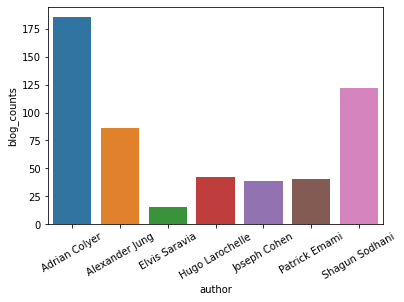

In [12]:
# Plot author distribution
blog_counts_df = blog_counts.to_frame()
blog_counts_df['author'] = blog_counts_df.index
blog_counts_df = blog_counts_df.rename(columns={"blog_id": "blog_counts"})
ax = sns.barplot(x="author", y="blog_counts", data=blog_counts_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [13]:
# Get distribution of blog websites
blog_counts = df.groupby('author_full_name')['source_website'].nunique()
blog_counts 

# 1-to-1 relationship between author and website 

author_full_name
Adrian Colyer      1
Alexander Jung     1
Elvis Saravia      1
Hugo Larochelle    1
Joseph Cohen       1
Patrick Emami      1
Shagun Sodhani     1
Name: source_website, dtype: int64

In [14]:
df.groupby('author_full_name')['source_website'].unique()

author_full_name
Adrian Colyer                      [https://blog.acolyer.org/about/]
Alexander Jung                     [https://github.com/aleju/papers]
Elvis Saravia       [https://github.com/dair-ai/nlp_paper_summaries]
Hugo Larochelle    [https://www.shortscience.org/user?name=hlaroc...
Joseph Cohen       [https://www.shortscience.org/user?name=joecohen]
Patrick Emami              [https://pemami4911.github.io/index.html]
Shagun Sodhani      [https://github.com/shagunsodhani/papers-I-read]
Name: source_website, dtype: object

In [15]:
# Get the average length per author
author_lens = df.groupby('author_full_name').agg({'summary_length': ['mean', 'std']})
author_lens

summary_length            
                           mean         std
author_full_name                           
Adrian Colyer       1055.502703  355.616032
Alexander Jung       641.069767  274.311021
Elvis Saravia        938.500000  205.163025
Hugo Larochelle      422.595238  212.739857
Joseph Cohen          90.230769   99.459450
Patrick Emami        428.268293  192.732071
Shagun Sodhani       490.139344  189.268156

In [39]:
# Double check summary content is identical to blog
samples = []

for author in df['author_full_name'].unique():
    author_rows = df.loc[df['author_full_name'] == author]
    sample = author_rows.sample(1)
    samples.append((author, sample['source_website'], sample['summary'], sample['pdf_url'])) 

In [44]:
for (author, website, summary, pdf_url) in samples:
    print(author)
    print(pdf_url[0])
    print(website[0])
    print(" ".join(summary[0][:6]))
    print("-"*30)

Adrian Colyer
http://homes.cs.washington.edu/~pedrod/papers/kdd00.pdf
https://blog.acolyer.org/about/
Mining High-Speed Data Streams – Domingos & Hulten 2000  This paper won a ‘test of time’ award at KDD’15 as an ‘outstanding paper from a past KDD Conference beyond the last decade that has had an important impact on the data mining community.’  Here’s what the test-of-time committee have to say about it:  This paper proposes a decision tree learner for data streams, the Hoeffding Tree algorithm, which comes with the guarantee that the learned decision tree is asymptotically nearly identical to that of a non-incremental learner using infinitely many examples. This work constitutes a significant step in developing methodology suitable for modern ‘big data’ challenges and has initiated a lot of follow-up research. The Hoeffding Tree algorithm has been covered in various textbooks and is available in several public domain tools, including the WEKA Data Mining platform. The goal is to creat